# Tarea 1: Minería de Datos IIC2433
<hr/>

**Alumno:** 
- Francisca Leão Cerquinho Ribeiro da Fonseca 

    (**No. alumno** : 19410263)

**Fecha de Entrega**
17 de septiembre de 2019, 23:59 hrs

### Introducción

Esta tarea consiste en estudiar en profundidad e implementar el algoritmo FP-Growth Borgelt [2005], el cual tiene por objetivo encontrar itemsets frecuentes dentro de una base de datos y generar las reglas de asociaci ́on que superan umbrales de soporte y confianza. Posterior a la implementaci ́on, dicho algoritmo se someter ́a a prueba en la extracci ́on de informaci ́on en una base de datos real.


### Definitions

**Itemset:** Colección de uno o más ítems

**Soporte:** Frecuencia relativa que un itemset aparece en la base de datos. 
    Esto se calcula como el número itemset que aparece en la base de datos de compras dividido por el número total de compras (transacciones).
    
 **Itemset frecuente:** Un itemset que aparece en una frecuencia mayor a un umbral. El umbral está determinado por uno o bien viene dado.
 
 **Regla de asociación:** Es una expresión de la forma X -> Y Donde X e Y son itemsets
 
 **Confianza:** 

    Confianza(X -> Y) = Soporte(X,Y) / Soporte(X)

 **Lift:** Permite medir el incremento del lado derecho de la regla (consecuente) dada la compra del lado izquierdo (antecedente)
 Confianza de la regla dividido por el soporte del consecuente.

    Lift = confianza(X -> Y) / Soporte(Y)

**- Lift > 1:** La probabilidad del consecuente de la regla aumentó dado que el consumidor compró los ítems del antecedente

**- Lift = 1:** La probabilidad no se vio afectada, es decir, el consecuente no se ve influenciado por el antecedente

**- Lift < 1:** El antecedente tuvo un efecto negativo en la ocurrencia del consecuente, lo que baja su probabilidad


#### Imports

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


### Implementar el algoritmo FP-Growth

El diccionario **itemSupport**, tiene como clave el elemento y como valor el soporte de este elemento.
Así reviso todo mi conjunto de datos y veo cuántas veces encuentro cada elemento

In [5]:
## Obtenemos el support de cada item
def getDatabaseArray(databaseName):
    database =  np.load(databaseName,allow_pickle=True)
    data_base_array = database.item()
    return data_base_array

def getItemsSupport(data_base_array,nr_arrays):
    itemsSupport = {}
    for i in range(nr_arrays):
        for item in data_base_array[i]:
            if item in itemsSupport:
                itemsSupport[item] = itemsSupport[item] + 1
            else:
                itemsSupport[item] = 1
    return itemsSupport

def drawItemsSupportTable(itemsSupport):
    table_vals = []
    for itemset, soporte in itemsSupport.items():
        row = [itemset,soporte]
        table_vals.append(row)

    # Tabla con el total de support de cada item

    col_labels = ['Item', 'Soporte']

    df = pd.DataFrame(table_vals)
    df.columns = col_labels
    lenTableVals = len(table_vals)
    return df,lenTableVals

Elimino elementos del diccionario **itemsSupport** que no tienen el soporte mínimo deseado (variable **min_support**) y clasifico por orden decreciente

In [6]:
def deleteElemsWithoutSupportMin(itemsSupport,min_support):
    ## Eliminamos elementos que no tienen el soporte mínimo deseado

    itemsSupport = {key:val for key, val in itemsSupport.items() if val >= min_support}

    #items ordenados

    itemsSupport = dict(sorted(itemsSupport.items() ,  key=lambda x: -x[1]))

    return itemsSupport

def drawElemsWithoutSupportMinTable(itemsSupport):
    # Tabla con los items ordenados que tienen el support mínimo deseado
    table_vals_supMin = []

    for itemset, soporte in itemsSupport.items():
        row = [itemset,soporte]
        table_vals_supMin.append(row)

    col_labels = ['Item c/ soporte min deseado', 'Soporte']

    df = pd.DataFrame(table_vals_supMin)
    df.columns = col_labels
    lenTableVals = len(table_vals_supMin)
    return df,lenTableVals

Para todo mi conjunto de datos, reviso cada conjunto de elementos y elimino los elementos que no tienen el soporte mínimo deseado.

Entonces creé dos funciones:

**- deleteArrayElements:** elimina elementos de todo el conjunto de elementos que no tienen el soporte mínimo deseado.

**- sortArrayElement:** ordena el conjunto de datos (L) en orden descendente

In [7]:
## Se encuentra el itemset ordenado basado en L (no en la columna itemset)

## - 1: eliminar elementos del array que no aparecen en el diccionario

def deleteArrayElements(array,itemsSupport):
    new_array = []
    for i in range(len(array)):
        elem = array[i]
        if elem in itemsSupport:
            new_array.append(elem)
    return list(set(new_array))

## - 2: ordenar elementos del array de forma descendente

def sortArrayElement(array,itemsSupport):
    for i in range(len(array)):
        for j in range(i+1,len(array)):
            if(itemsSupport[array[i]] < itemsSupport[array[j]]):
                temp = array[i]
                array[i] = array[j]
                array[j] = temp
    return array

def orderItemSet(data_base_array,itemsSupport,nr_arrays):

    # itemset ordenado
    new_data_base_array = []

    for i in range(nr_arrays):
        new_array = deleteArrayElements(data_base_array[i],itemsSupport)
        new_array = sortArrayElement(new_array,itemsSupport)
        if len(new_array) != 0:
            new_data_base_array.append(new_array)
    return new_data_base_array

def orderItemSetTable(new_data_base_array):
    # Tabla con los itemsets ordenados que tienen el support mínimo deseado

    tabla_itemsets_ordenado = []

    for itemset in new_data_base_array:
        item = ' , '.join(itemset)
        tabla_itemsets_ordenado.append(item)


    col_labels = ['Itemset Ordenado']

    df = pd.DataFrame(tabla_itemsets_ordenado)
    df.columns = col_labels
    lenTableVals = len(tabla_itemsets_ordenado)
    return df,lenTableVals

### Construcción del árbol

Para encontrar toda mi Conditional Pattern Base, revisé mi **itemsSupport** y para cada item percorri cada conjunto de items(itemset) para encontrar la Conditional pattern base de ese item y la cantidad de veces que aparece.

Lo guardé en un diccionario **conditionalPattern_array**:

**conditionalPattern_array {**

**'item':** [

    {'pattern': 3},
    
    {'pattern2': 1},
    
    ],

    .... 

**}**

In [8]:
## Construcción del árbol

def returnPattern_stringIndex(pattern_string, list_patterns):
    for i in range(len(list_patterns)):
        for key,value in list_patterns[i].items():
            if key == pattern_string:
                return i
            
def getConditionalPattern_array(new_data_base_array,itemsSupport):
    conditionalPattern_array = {}

    # Pasar por todos los elementos de itemsSupport y encontrar su "Conditional pattern"
    # La estructura es un diccionario, donde la clave es el elemento y el valor es una lista de diccionarios
        # este diccionario tiene como clave el "Conditional pattern" y como valor el número de veces que tenemos esa
            #"Conditional pattern"
    for item in itemsSupport:
        dict_item = {}
        list_patterns = []

        for i in range(len(new_data_base_array)):
            itemset = new_data_base_array[i]
            if item in itemset:
                #cortar el array del conjunto de elementos para indexar donde aparece el elemento
                index = itemset.index(item)
                pattern = itemset[0:index]
                pattern_string = tuple(pattern)
                pattern_dictionary = {}
                if len(list_patterns) != 0 and len(pattern) != 0:  
                    #ver si ya encontramos este patrón 
                    if any(pattern_string in x for x in list_patterns):
                        index = returnPattern_stringIndex(pattern_string, list_patterns)
                        list_patterns[index][pattern_string] = list_patterns[index][pattern_string] + 1
                    else:
                        pattern_dictionary[pattern_string] = 1
                        list_patterns.append(pattern_dictionary)
                else:
                    if  len(pattern) != 0:
                        pattern_dictionary[pattern_string] = 1
                        list_patterns.append(pattern_dictionary)
        conditionalPattern_array[item]=list_patterns
        
    return conditionalPattern_array

def conditionalPatternArrayTable(conditionalPattern_array):
    # Tabla con los itemsets ordenados y su conditional pattern

    tabla_itemsets_ordenado = []

    for itemset,patterns in conditionalPattern_array.items():
        support = ''
        for pattern in patterns:
            for pat,value in pattern.items():
                item = '{'+','.join(pat)+':'+str(value)+'}, '
                support = support + item
        if support == '':
            col = [itemset,'-']
            tabla_itemsets_ordenado.append(col)
        else: 
            col = [itemset,support[:-2]]
            tabla_itemsets_ordenado.append(col)

    col_labels = ['Itemset Ordenado', 'Conditional pattern base']

    df = pd.DataFrame(tabla_itemsets_ordenado)
    df.columns = col_labels
    lenTableVals = len(tabla_itemsets_ordenado)
    return df,lenTableVals

Busque el conditional FP-Tree, buscando elementos comunes en el itemset del conditional pattern base.
Para hacer esto, revisé mi conditionalPattern_array y para cada elemento, su lista de base de patrón condicional y 
comprobé cuáles eran los patrones comunes y con qué frecuencia aparecían en mi lista de conditional pattern base.

El resultado se almacenó en un diccionario **dict_itemsComunes**, que tiene la siguiente estructura:

**dict_itemsComunes {**

**'item':** [

    {'pattern': 3},
    
    {'pattern2': 1},
    
    ],

    .... 

**}**

In [9]:
def changeListOfOccurrences(a, b,listOfOccurrences):
    if len(a) >= len(b):
        length = len(b)
    else:
        length = len(a)
    for i in range(length):
        if a[i] == b[i]:
            listOfOccurrences[i] = listOfOccurrences[i] + 1
        else:
            return listOfOccurrences
    return listOfOccurrences

def getCommonValues(firstElem,listOfOccurrences,arrayLength):
    length = len(firstElem)
    maxOccurrence = -1
    endIndex = -1
    if len(listOfOccurrences)==1 and listOfOccurrences[0] == arrayLength:
        return [firstElem[0]]
    if listOfOccurrences[0] == arrayLength:
        maxOccurrence = listOfOccurrences[0]
        endIndex = 0
    else:
        return []
    for i in range(1,length):
        if listOfOccurrences[i]==maxOccurrence:
            endIndex = i   
        else:
            return firstElem[:endIndex+1]
            
             
def commonsElemInArrayOfArrays(array):
    firstElem = array[0]
    listOfOccurrences = [1 for i in range(len(firstElem))]
    if len(array)==1:
        return array[0]
    for j in range(1,len(array)):
        listOfOccurrences = changeListOfOccurrences(firstElem,array[j],listOfOccurrences)
       
    arrayLength = len(array)
    common = getCommonValues(firstElem,listOfOccurrences,arrayLength)
    return common

In [10]:
def getCommonsItems(conditionalPattern_array):
    #  buscar los items comunes en itemset de conditional pattern base

    dict_itemsComunes = {}
    for item,listpatterns in conditionalPattern_array.items():
        dict_itemElemCommon = {}
        listToDict = {k: v for d in listpatterns for k, v in d.items()}
        keys = list(listToDict.keys())
        value = sum(listToDict.values())
        itemSets = []
        for itemset in keys:
             #tuple to array
            newItemset = list(itemset) 
            itemSets.append(newItemset)
        if len(itemSets) > 0:
            common = commonsElemInArrayOfArrays(itemSets)
            if len(common)!=0:
                string = tuple(common) 
                dict_itemElemCommon[string]=value

        dict_itemsComunes[item] = dict_itemElemCommon
    return dict_itemsComunes

def getCommonsItemsTable(dict_itemsComunes,conditionalPattern_array):
    # Tabla con los items comunes en itemset de conditional pattern base
    tabla_itemSetsCommons = []
    for item,itemsCommons in dict_itemsComunes.items():
        if bool(itemsCommons) == True:
            row = []
            row.append(item)
            patterns = conditionalPattern_array[item]

            support = ''
            for pattern in patterns:
                for pat,value in pattern.items():
                    item = '{'+','.join(pat)+':'+str(value)+'}, '
                    support = support + item
            if support == '':
                row.append('-')
            else: 
                row.append(support[:-2])

            support = ''
            for pat,value in itemsCommons.items():
                item = '{'+','.join(pat)+':'+str(value)+'}, '
                support = support + item
            row.append(support[:-2])
            tabla_itemSetsCommons.append(row)


    col_labels = ['Itemset Ordenado', 'Conditional pattern base', 'Conditional FP-Tree']

    df = pd.DataFrame(tabla_itemSetsCommons)
    df.columns = col_labels
    lenTableVals = len(tabla_itemSetsCommons)
    return df,lenTableVals

Finalmente, el patrón frecuente se busca utilizando la columna Items y Condicional FP-Tree.

Para hacer esto, revisé mis dict_itemsComunes y agregué mi artículo al final del conditionalFP-Tree.

La estructura se almacenó en un diccionario **dict_frequent_pattern**:

**dict_frequent_pattern {**

**'item':** [

    {'frequent_pattern': 3},
    
    {'frequent_pattern2': 1},
    
    ],

    .... 

**}**

In [11]:
def getFrequentPattern(dict_itemsComunes):
    # Finalmente se buscan los frequent pattern usando la columna Items y Conditional FP-Tree
    # dict_itemsComunes -> Conditional PF-Tree
    # itemsSupport -> columna Items

    dict_frequent_pattern = {}
    for itemset, listpatterns in dict_itemsComunes.items():
        dict_item_frequent_pattern = {}
        for pattern, value in listpatterns.items():
            tupleList = list(pattern)
            tupleList.append(itemset)
            new_pattern = tuple(tupleList)
            dict_item_frequent_pattern[new_pattern] = value
            tupleList = list(pattern)
            for item in tupleList:
                new_pattern = (item,itemset)
                dict_item_frequent_pattern[new_pattern] = value
        if len(listpatterns) > 0:
            dict_frequent_pattern[itemset]=dict_item_frequent_pattern
    return dict_frequent_pattern

def frequentPatternTable(dict_frequent_pattern):

    # Tabla con los itemset más frecuentes (dict_frequent_pattern) (itemsSupport + dict_itemsComunes)

    tabla_itemsets_moreFreq = []
    for itemset,freqPatterns in dict_frequent_pattern.items():
        freqPatternsString = ''
        for pattern,value in freqPatterns.items():
            freqPatternsString = freqPatternsString + '<' + ','.join(pattern) + ':' + str(value) + '> '
        tabla_itemsets_moreFreq.append([itemset,freqPatternsString])


    col_labels = ['Item','Frequence pattern']

    df = pd.DataFrame(tabla_itemsets_moreFreq)
    df.columns = col_labels
    lenTableVals = len(tabla_itemsets_moreFreq)
    return df,lenTableVals

Ahora agregué mis itemsSupport con mi dict_frequent_pattern para encontrar los conjuntos de artículos más frecuentes
La estructura se almacenó en un diccionario **itemset_freq**:

**itemset_freq {**

    'frequent_pattern1': 3,

    'frequent_pattern2': 3,
    
    'frequent_pattern3': 1,
    

    .... 

**}**

In [12]:
def getFrequentItems(dict_frequent_pattern,itemsSupport):
    # Los itemset más frecuentes son: (itemsSupport + dict_frequent_pattern)

    itemset_freq = {}
    for itemset, dicts in dict_frequent_pattern.items():
        for pattern,value in dicts.items():
            itemset_freq[pattern]=value

    for itemset,support in itemsSupport.items():
        itemset_freq[itemset] = support
        
    return itemset_freq

def frequentItemsTable(itemset_freq):
    # Tabla con los itemset más frecuentes (itemsSupport + dict_frequent_pattern)

    tabla_itemsets_moreFreq = []
    for itemset,freqPatterns in itemset_freq.items():
        tabla_itemsets_moreFreq.append([itemset,freqPatterns])

    col_labels = ['Frequence pattern', 'Soporte']

    df = pd.DataFrame(tabla_itemsets_moreFreq)
    df.columns = col_labels
    lenTableVals = len(tabla_itemsets_moreFreq)
    return df,lenTableVals

In [147]:
nr_arrays = 100
min_support = 4
databaseName = 'spotify.npy'
  
def fit(databaseName,nr_arrays,min_support):
   
    databaseArray= getDatabaseArray(databaseName)
    
    itemsSupport = getItemsSupport(databaseArray,nr_arrays)

    elemsWithoutSupportMin = deleteElemsWithoutSupportMin(itemsSupport,min_support)

    itemSetOrdered = orderItemSet(databaseArray,elemsWithoutSupportMin,nr_arrays)

    conditionalPatternArray = getConditionalPattern_array(itemSetOrdered,elemsWithoutSupportMin)
    
    commonsItems = getCommonsItems(conditionalPatternArray)

    frequentPatterns = getFrequentPattern(commonsItems)

    frequentItems = getFrequentItems(frequentPatterns,elemsWithoutSupportMin)
    
    return itemsSupport,elemsWithoutSupportMin,itemSetOrdered,conditionalPatternArray,commonsItems,frequentPatterns,frequentItems

#Función Fit -> llamada
itemsSupport,elemsWithoutSupportMin,itemSetOrdered,conditionalPatternArray,commonsItems,frequentPatterns,frequentItems = fit(databaseName,nr_arrays,min_support)

In [148]:
# Tabla con el total de support de cada item
itemsSupportTable,lenTableVals = drawItemsSupportTable(itemsSupport)
itemsSupportTable.head(lenTableVals)

,Item,Soporte
0,Lose Control (feat. Ciara & Fat Man Scoop),1
1,Toxic,2
2,Crazy In Love,3
3,Rock Your Body,2
4,It Wasn't Me,1
5,Yeah!,4
6,My Boo,1
7,Buttons,1
8,Say My Name,4
9,Hey Ya! - Radio Mix / Club Mix,3


In [160]:
# Tabla con los items ordenados que tienen el support mínimo deseado
elemsWithoutSupportMinTable,lenTableVals = drawElemsWithoutSupportMinTable(elemsWithoutSupportMin)
elemsWithoutSupportMinTable.head(lenTableVals)

,Item c/ soporte min deseado,Soporte
0,Closer,10
1,Latch,8
2,Shape of You,7
3,Billie Jean,6
4,Thinking Out Loud,6
5,Chandelier,6
6,Down,6
7,Waves,6
8,Replay,5
9,Stay,5


In [150]:
# Tabla con los itemsets ordenados que tienen el support mínimo deseado
itemSetOrderedTable,lenTableVals = orderItemSetTable(itemSetOrdered)
itemSetOrderedTable.head(lenTableVals)

,Itemset Ordenado
0,"Closer , Replay , Yeah! , Party In The U.S.A. ..."
1,"Crazy , Bohemian Rhapsody - Remastered 2011"
2,Push
3,Stay
4,"Billie Jean , Thinking Out Loud , We Found Lov..."
5,Chandelier
6,"Latch , Feels , Jungle"
7,"goosebumps , oui , How To Love"
8,"Closer , You"
9,"Closer , Down , Drive , Slide , Push , All The..."


In [157]:
# Tabla con los itemsets ordenados y su conditional pattern
conditionalPatternTable,lenTableVals = conditionalPatternArrayTable(conditionalPatternArray)
conditionalPatternTable.head(lenTableVals)

,Itemset Ordenado,Conditional pattern base
0,Closer,-
1,Latch,-
2,Shape of You,{Closer:2}
3,Billie Jean,-
4,Thinking Out Loud,"{Billie Jean:1}, {Closer,Shape of You:1}, {Cha..."
5,Chandelier,"{Thinking Out Loud:1}, {Shape of You:1}"
6,Down,{Closer:2}
7,Waves,"{Closer,Shape of You,Thinking Out Loud:1}, {La..."
8,Replay,"{Closer:2}, {Closer,Shape of You,Thinking Out ..."
9,Stay,"{Capsize:1}, {Closer:1}, {Thinking Out Loud,We..."


In [159]:
# Tabla con los items comunes en itemset de conditional pattern base
commonsItemsTable,lenTableVals = getCommonsItemsTable(commonsItems,conditionalPatternArray)
commonsItemsTable.head(lenTableVals)

,Itemset Ordenado,Conditional pattern base,Conditional FP-Tree
0,Shape of You,{Closer:2},{Closer:2}
1,Down,{Closer:2},{Closer:2}
2,Replay,"{Closer:2}, {Closer,Shape of You,Thinking Out ...",{Closer:4}
3,Cruise,"{Closer,Shape of You,Thinking Out Loud,Waves,W...","{Closer,Shape of You,Thinking Out Loud,Waves,W..."
4,7 Years,"{Closer,Shape of You,Thinking Out Loud,Waves,W...",{Closer:3}
5,I'd Rather Be With You,{Latch:1},{Latch:1}


In [153]:
# Tabla con los itemset más frecuentes (dict_frequent_pattern) (itemsSupport + dict_itemsComunes)
frequentPatternsTable,lenTableVals = frequentPatternTable(frequentPatterns)
frequentPatternsTable.head(lenTableVals)

,Item,Frequence pattern
0,Shape of You,"<Closer,Shape of You:2>"
1,Down,"<Closer,Down:2>"
2,Replay,"<Closer,Replay:4>"
3,Cruise,"<Closer,Shape of You,Thinking Out Loud,Waves,W..."
4,7 Years,"<Closer,7 Years:3>"
5,I'd Rather Be With You,"<Latch,I'd Rather Be With You:1>"


In [154]:
# Tabla con los itemset más frecuentes (itemsSupport + dict_frequent_pattern)
tableFrequentItems,lenTableVals = frequentItemsTable(frequentItems)
tableFrequentItems.head(lenTableVals)

,Frequence pattern,Soporte
0,"(Closer, Shape of You)",2
1,"(Closer, Down)",2
2,"(Closer, Replay)",4
3,"(Closer, Shape of You, Thinking Out Loud, Wave...",1
4,"(Closer, Cruise)",1
5,"(Shape of You, Cruise)",1
6,"(Thinking Out Loud, Cruise)",1
7,"(Waves, Cruise)",1
8,"(Wrecking Ball, Cruise)",1
9,"(Replay, Cruise)",1



### Aplicar el algoritmo a la base de datos entregada y filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 


In [41]:
# Encontrando las reglas de asociación

### Function that creates all unique and different combinations of an array of elements
def join(singular_itemsets, comb):    
    comb = []
    for i in singular_itemsets:
        for j in singular_itemsets:
            if [i,j] not in comb and [j,i] not in comb and i != j:
                if isinstance(i, list): 
                    len_combination = len(i)-1
                    if(i[:len_combination] == j[:len_combination]):
                        in_first = set(i)
                        in_second = set(j)
                        in_second_but_not_in_first = in_second - in_first
                        finalList = list(in_first) + list(in_second_but_not_in_first)
                        if len(comb) > 1:
                            exists = False
                            for elem in comb:
                                checklist = set(finalList) - set(elem)
                                if set(finalList) == set(elem):
                                    exists = True
                            if exists is False:
                                comb.append(finalList)
                            
                        else:
                            comb.append(finalList)
                else:
                    comb.append( [i,j] )

    return comb

def generate(itemset_freq):
    dict_itemsets_conf_sup = {}
    table_vals = []
    max_value = max(itemset_freq.values())
    for itemset, support in itemset_freq.items():
        if isinstance(itemset, tuple):
            #tuple to array
            split = list(itemset)
            #Hacer todas las combinaciones posibles para calcular la confianza de cada itemset
            combinations = join(split,[])
            #Para cada combinación calcular la confianza y agregar al diccionario dict_itemsets_confidence
            for comb in combinations:
                if len(comb)==2:
                    X = comb[0]
                    Y = comb[1]
                else:
                    aux_X = set(split)-set(comb)
                    X = tuple(aux_X)
                    Y = tuple(comb)

                # Calcular el soporte y la confianza de cada itemset_freq
                if Y not in itemset_freq:
                    supportXY = itemset_freq[itemset] / max_value
                    if X not in itemset_freq:
                        confidence = 0
                    lift = 0
                else:
                    if X not in itemset_freq:
                        supportXY = itemset_freq[itemset] / max_value
                        supportY = itemset_freq[Y] / max_value
                        confidence = 0
                        lift = confidence / supportY
                    else:
                        supportXY = itemset_freq[itemset] / max_value
                        supportX = itemset_freq[X] / max_value
                        supportY = itemset_freq[Y] / max_value
                        confidence = supportXY / supportX
                        lift = confidence / supportY
                if isinstance(X,tuple):
                    X = ','.join(X)
                if isinstance(Y,tuple):
                    Y = ','.join(Y)
                string = X + ' -> ' + Y
                conf_sup = str(round(supportXY,3)) + ',' + str(round(confidence,3)) + ',' + str(round(lift,3))
                dict_itemsets_conf_sup[string] = conf_sup
                if confidence != 0 and lift != 0:
                    col = [string, str(round(supportXY*100,3)) +'%',str(round(confidence*100,3)) + '%',str(round(lift,3))]
                    table_vals.append(col)
                else:
                    if confidence == 0:
                        col = [string,str(round(supportXY*100,3))+'%','-',str(round(lift,3))]
                        table_vals.append(col)
                    else:
                        col = [string,str(round(supportXY*100,3))+'%',str(round(confidence*100,3))+'%','-']
                        table_vals.append(col)

    # Tabla con soporte y valores de confianza

    col_labels = ['Frequent Itemsets', 'Soporte', 'Confianza', 'Lift']

    df = pd.DataFrame(table_vals)
    df.columns = col_labels
    lenTableVals = len(table_vals)
    return dict_itemsets_conf_sup,df, lenTableVals


In [42]:
dict_itemsets_conf_sup,df, lenTableVals = generate(frequentItems)
df.head(lenTableVals)

,Frequent Itemsets,Soporte,Confianza,Lift
0,Closer -> Roses,20.0%,20.0%,0.286
1,Home -> Silent Night,2.0%,4.0%,0.1
2,Silent Night -> White Christmas,12.0%,30.0%,0.938
3,Silent Night -> O Holy Night,6.0%,15.0%,1.071
4,Silent Night -> The First Noel,8.0%,20.0%,1.429
5,Silent Night -> I'll Be Home For Christmas,10.0%,25.0%,2.083
6,Silent Night -> White Christmas,10.0%,25.0%,0.781
7,Silent Night -> Rockin' Around The Christmas T...,10.0%,25.0%,2.5
8,White Christmas -> Rockin' Around The Christma...,10.0%,31.25%,3.125
9,Silent Night -> Rockin' Around The Christmas T...,10.0%,25.0%,2.5


In [43]:
#Filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 

def top10ReglasSupConfLift(dict_itemsets_conf_sup,support, confidence, lift):
    dict_aux = {}
    for item,value in dict_itemsets_conf_sup.items():
        conf_sup = value.split(',')
        if float(conf_sup[0]) >= support and float(conf_sup[1]) >= confidence and float(conf_sup[2]) >= lift:
            dict_aux[item] = conf_sup[1]
    list_aux = sorted(dict_aux.items(), key=lambda kv: kv[1], reverse=True)
    top10 = [i[0] for i in list_aux]
    
    return top10[:10]

In [44]:
#Filtrar las mejores 10 reglas de acuerdo a dos criterios de calidad definidos 

def top10Reglas(dict_itemsets_conf_sup,support, confidence):
    dict_aux = {}
    for item,value in dict_itemsets_conf_sup.items():
        conf_sup = value.split(',')
        if float(conf_sup[0]) >= support and float(conf_sup[1]) >= confidence:
            dict_aux[item] = conf_sup[1]
    list_aux = sorted(dict_aux.items(), key=lambda kv: kv[1], reverse=True)
    top10 = [i[0] for i in list_aux]
    
    return top10[:10]

In [45]:
def drawAssociationRulesTable(dict_itemsets_conf_sup,associationRules,desiredSupport,desiredConfidence,desiredLift):
    
    tabla = []
    for regla in associationRules:
        value = dict_itemsets_conf_sup[regla]
        conf_sup = value.split(',')
        for i in range(len(conf_sup)-1):
            conf_sup[i] = str(round(float(conf_sup[i])*100,3))+'%'
        conf_sup.insert(0,regla)
        tabla.append(conf_sup)

    if len(top10) == 0:
        if desiredLift!= -1:
            print ('No existen 10 associaciónes para soporte >= {}, confianza > = {} y lift >= {}'.format(desiredSupport,desiredConfidence, desiredLift))
        else:
            print ('No existen 10 associaciónes para soporte >= {} y confianza > = {}'.format(desiredSupport,desiredConfidence))
    else:
        if desiredLift!= -1:
            print("Las 10 mejores reglas de asociación para soporte >= {}, confianza > = {} y lift >= {},\n seleccionando los 10 elementos con el valor de confianza más alto:"
              .format(desiredSupport,desiredConfidence,desiredLift))
        else:
            print("Las 10 mejores reglas de asociación para soporte >= {} y confianza > = {},\n seleccionando los 10 elementos con el valor de confianza más alto:"
                  .format(desiredSupport,desiredConfidence))
    
    col_labels = ['Reglas','Soporte','Confianza','Lift']
    df = pd.DataFrame(tabla)
    df.columns = col_labels
    lenTableVals = len(tabla)

    return df, lenTableVals 

In [46]:
desiredSupport = 0.045
desiredConfidence = 0.001

top10 = top10Reglas(dict_itemsets_conf_sup,desiredSupport,desiredConfidence)
                                          
dfTop10, lenTableValsTop10 = drawAssociationRulesTable(dict_itemsets_conf_sup,top10,desiredSupport,desiredConfidence,-1)
dfTop10.head(lenTableValsTop10)

Las 10 mejores reglas de asociación para soporte >= 0.045 y confianza > = 0.001,
 seleccionando los 10 elementos con el valor de confianza más alto:


,Reglas,Soporte,Confianza,Lift
0,Winter Wonderland -> Carol of the Bells,8.0%,40.0%,4.0
1,Winter Wonderland -> A Holly Jolly Christmas -...,8.0%,40.0%,5.0
2,White Christmas -> Rockin' Around The Christma...,10.0%,31.2%,3.125
3,Winter Wonderland -> Silver Bells - Single Ver...,6.0%,30.0%,3.75
4,Silent Night -> I'll Be Home For Christmas,10.0%,25.0%,2.083
5,Silent Night -> Rockin' Around The Christmas T...,10.0%,25.0%,2.5
6,White Christmas -> Winter Wonderland,8.0%,25.0%,1.25
7,White Christmas -> Carol of the Bells,8.0%,25.0%,2.5
8,White Christmas -> A Holly Jolly Christmas - S...,8.0%,25.0%,3.125
9,Closer -> Roses,20.0%,20.0%,0.286


In [47]:
desiredSupport = 0.045
desiredConfidence = 0.001
desiredLift = 1

top10SupConfLift = top10ReglasSupConfLift(dict_itemsets_conf_sup,desiredSupport,desiredConfidence, desiredLift)
dfTop10SupConfLift, lenTableVals = drawAssociationRulesTable(dict_itemsets_conf_sup,top10,desiredSupport,desiredConfidence,-1)
dfTop10SupConfLift.head(lenTableVals)


Las 10 mejores reglas de asociación para soporte >= 0.045 y confianza > = 0.001,
 seleccionando los 10 elementos con el valor de confianza más alto:


,Reglas,Soporte,Confianza,Lift
0,Winter Wonderland -> Carol of the Bells,8.0%,40.0%,4.0
1,Winter Wonderland -> A Holly Jolly Christmas -...,8.0%,40.0%,5.0
2,White Christmas -> Rockin' Around The Christma...,10.0%,31.2%,3.125
3,Winter Wonderland -> Silver Bells - Single Ver...,6.0%,30.0%,3.75
4,Silent Night -> I'll Be Home For Christmas,10.0%,25.0%,2.083
5,Silent Night -> Rockin' Around The Christmas T...,10.0%,25.0%,2.5
6,White Christmas -> Winter Wonderland,8.0%,25.0%,1.25
7,White Christmas -> Carol of the Bells,8.0%,25.0%,2.5
8,White Christmas -> A Holly Jolly Christmas - S...,8.0%,25.0%,3.125
9,Closer -> Roses,20.0%,20.0%,0.286



###  Explicar las reglas obtenidas.

**Soporte:** indica con qué frecuencia los elementos de la regla ocurren juntos.

**Confianza:** Indica la probabilidad de que ocurra un antecedente y consecuente en la misma transacción.

**Lift:** indica qué tan fuerte es la regla de asociación.

Durante la implementación del algoritmo:

1. He determinado todos los conjuntos de elementos que admiten *min_support* o superior. Estos conjuntos se denominan conjuntos de elementos frecuentes.
2. Para cada conjunto frecuente encontrado en el Paso 1, genere reglas de asociación que tengan *desiredConfidence* mayor o igual que *desiredConfidence*.

Para que una regla se considere sólida y contenga información interesante, debe tener un buen soporte y valores de confianza. La decisión sobre qué reglas mantener y cuáles descartar se basa en estos dos valores. Esto significa que el apoyo y la confianza actúan como medidas de interés en el proceso de elegir las mejores reglas de asociación.

Haciendo un análisis del valor del soporte obtenido, usaremos el ejemplo: Drunk On You -> Cruise, Crash My Party.
El valor de la medida de soporte indica que el 13.6% de las personas que usan Spotify escuchan ambas canciones (Drunk On You, Cruise y Crash My Party) durante su estadía en la aplicación.
El valor de la medida de confianza indica que la probabilidad de que un usuario haya escuchado las canciones (Cruise y Crash My Party), ya que también escucharon Drunk on You es 42.9%.
Finalmente, como Lift> 1, el valor de la medida de interés de la regla indica que las personas que escuchan las canciones de Cruise y Crash My Party son 3.143 veces más altas entre los usuarios que escuchan Drunk On You.
Los resultados demuestran que las reglas de asociación pueden servir como una herramienta para apoyar el proceso de toma de decisiones de gestión, por ejemplo, es posible identificar varios perfiles de usuario y, por lo tanto, ayudar en sus recomendaciones.


### Visualizar las reglas

In [163]:
def convertRulesToTuples(associationRules):
    rules = {}
    for regla in associationRules:
        split = regla.split(' -> ')
        elem1 = tuple([split[0]])
        elem2 = tuple([split[1]])
        rules[elem1]=elem2
    return rules

In [103]:
def makeAdditionalInformation(associationRules,dict_itemsets_conf_sup,metric):
    informations = {}
    for regla in associationRules:
        info = []
        split = regla.split(' -> ')
        tupe = tuple(split)
        value = dict_itemsets_conf_sup[regla]
        conf_sup = value.split(',')
        informations[tupe]=float(conf_sup[metric])
    return informations

In [79]:
pip install networkx

Note: you may need to restart the kernel to use updated packages.


In [119]:
import networkx as ntw
import colorsys as cs

# parameter
# ---------------
# if withAdditionalInformation == False:
# rules: dictionary of tupel:tupel
#        left side of Rule : right side of rule
# else:
# rules: dictionary of tupel,tupel : value
#        (leftSideofRule,rightSideofRule) : suport, count or lift of rule
def visualize(rules,withAdditionalInformation):
    nodeSize = []
    if (withAdditionalInformation):
        information = [v for k,v in rules.items()]
        rules       = [(k[0],k[1]) for k,v in rules.items()]
        nodeSize    = [1500 * ((size-min(information))/(max(information)-min(information)))+500  for size in information]
    else:
        rules       = [(rule,rules[rule])for rule in rules]
        nodeSize    = 500
    graph           = ntw.DiGraph()
    # array to store the different colors for the edges that correspond to the same rule
    colorsEdgesSort = {}
    # one color and one node per rule
    colors = [cs.hsv_to_rgb((1.0 / (len(rules) + 1)) * value, 1.0, 1.0) for value in range(0, len(rules))] 
    for i in range(0,len(rules)):
        graph.add_nodes_from(["R"+str(i)])

    ruleNodes = list(graph.nodes())
    # for each rule draw the missing nodes of the items/ songs and all edges in the same color
    
    rulesLeft  = [rule[0] for rule in rules]
    rulesRight = [rule[1] for rule in rules]
    for i in range(0,len(rules)):
        colorTemp = colors[i]
        for songLeft in rulesLeft[i]:
            if not songLeft in graph:
                graph.add_nodes_from([songLeft])
            graph.add_edge(songLeft,ruleNodes[i])
            colorsEdgesSort = {**colorsEdgesSort,(songLeft,ruleNodes[i]):colorTemp}
        for songRight in rulesRight[i]:
            if not songRight in graph:
                graph.add_nodes_from([songRight])
            graph.add_edge(ruleNodes[i],songRight)
            colorsEdgesSort = {**colorsEdgesSort,(ruleNodes[i],songRight):colorTemp}

    # as edges of the graph are sorted automatically, their colors have to be sorted as well
    colorsEdges = [colorsEdgesSort[edge] for edge in graph.edges()] 
    
    layout          = ntw.circular_layout(graph)
    nodes = ntw.draw_networkx_nodes(graph,layout,ruleNodes,node_size=nodeSize,node_color="white")
    nodes.set_edgecolor("black")
    ntw.draw_networkx_nodes(graph,layout,set(graph.nodes())-set(ruleNodes),node_color="white")
    ntw.draw_networkx_edges(graph,layout,edge_color=colorsEdges)
    ntw.draw_networkx_labels(graph,layout,color=ntw.get_node_attributes(graph,'label'))
    plt.axis('off')
    plt.show()

In [164]:
#TOP5 RULES

additionalInformation_Top5 = makeAdditionalInformation(top10[:5],dict_itemsets_conf_sup,0)
rules_Top5 = convertRulesToTuples(top10[:5])

print('RULES TOP 5',rules_Top5)
print('\nAdditionalInformation TOP 5',additionalInformation_Top5)

RULES TOP 5 {('Winter Wonderland',): ('Silver Bells - Single Version',), ('White Christmas',): ("Rockin' Around The Christmas Tree - Single Version",), ('Silent Night',): ("I'll Be Home For Christmas",)}

AdditionalInformation TOP 5 {('Winter Wonderland', 'Carol of the Bells'): 0.08, ('Winter Wonderland', 'A Holly Jolly Christmas - Single Version'): 0.08, ('White Christmas', "Rockin' Around The Christmas Tree - Single Version"): 0.1, ('Winter Wonderland', 'Silver Bells - Single Version'): 0.06, ('Silent Night', "I'll Be Home For Christmas"): 0.1}


In [162]:
#TOP10 RULES

additionalInformation_Top10 = makeAdditionalInformation(top10,dict_itemsets_conf_sup,0)
rules_Top10 = convertRulesToTuples(top10)
print('RULES TOP 10',rules_Top10)
print('\nAdditionalInformation TOP 10',additionalInformation_Top10)

RULES TOP 10 {('W', 'i', 'n', 't', 'e', 'r', ' ', 'W', 'o', 'n', 'd', 'e', 'r', 'l', 'a', 'n', 'd'): ('S', 'i', 'l', 'v', 'e', 'r', ' ', 'B', 'e', 'l', 'l', 's', ' ', '-', ' ', 'S', 'i', 'n', 'g', 'l', 'e', ' ', 'V', 'e', 'r', 's', 'i', 'o', 'n'), ('W', 'h', 'i', 't', 'e', ' ', 'C', 'h', 'r', 'i', 's', 't', 'm', 'a', 's'): ('A', ' ', 'H', 'o', 'l', 'l', 'y', ' ', 'J', 'o', 'l', 'l', 'y', ' ', 'C', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', ' ', '-', ' ', 'S', 'i', 'n', 'g', 'l', 'e', ' ', 'V', 'e', 'r', 's', 'i', 'o', 'n'), ('S', 'i', 'l', 'e', 'n', 't', ' ', 'N', 'i', 'g', 'h', 't'): ('R', 'o', 'c', 'k', 'i', 'n', "'", ' ', 'A', 'r', 'o', 'u', 'n', 'd', ' ', 'T', 'h', 'e', ' ', 'C', 'h', 'r', 'i', 's', 't', 'm', 'a', 's', ' ', 'T', 'r', 'e', 'e', ' ', '-', ' ', 'S', 'i', 'n', 'g', 'l', 'e', ' ', 'V', 'e', 'r', 's', 'i', 'o', 'n'), ('C', 'l', 'o', 's', 'e', 'r'): ('R', 'o', 's', 'e', 's')}

AdditionalInformation TOP 10 {('Winter Wonderland', 'Carol of the Bells'): 0.08, ('Winter Wonderlan

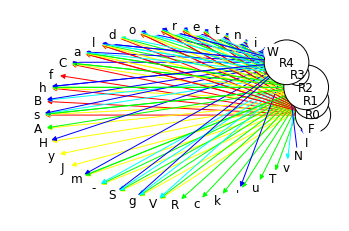

In [139]:
visualize(additionalInformation_Top5,True)

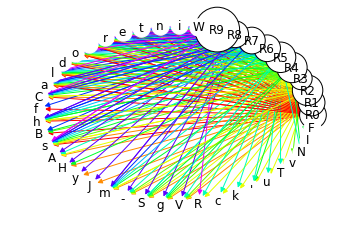

In [140]:
visualize(additionalInformation_Top10,True)

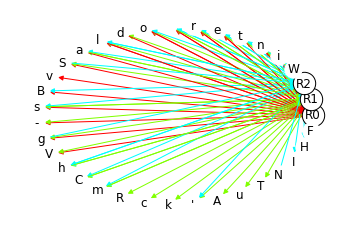

In [141]:
visualize(rules_Top5,False)

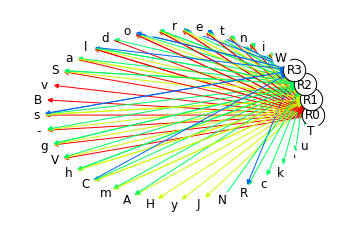

In [142]:
visualize(rules_Top10,False)

<hr/>
<center> <h2>Fin del Tarea.</h2> </center>
<center> <h3>Minería de Datos</h3> </center>
<center> <h4>Francisca Leão Cerquinho Ribeiro da Fonseca</h4> </center>
​